#Data Preprocessing Before Building Machine Learning Model
##Steps:
1. Import necessary libraries.
2. Read Dataset.
3. Sanity check of data.
4. Exploratory Data Analysis(EDA).
5. Missing Value treatments.
6. Outliers treatments.
7. Duplicate Treatment.
8. Normalization.
9. Data Encoding.




##1.Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2.Read Data using Pandas Library


In [ ]:
#read data
df = pd.read_csv('/content/Life_Expectancy_Data.csv')

In [ ]:
#head
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Id
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2
2,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,3
3,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,4
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,5


In [ ]:
#tail
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Id
2936,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,2937
2937,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,2938
2938,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,2939
2939,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8,2940
2940,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8,2941


In [ ]:
#Check the shape of the data
df.shape

(2941, 23)

In [ ]:
#check data info (column datatypes and number of non  null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2941 non-null   object 
 1   Year                             2941 non-null   int64  
 2   Status                           2941 non-null   object 
 3   Life expectancy                  2931 non-null   float64
 4   Adult Mortality                  2931 non-null   float64
 5   infant deaths                    2941 non-null   int64  
 6   Alcohol                          2747 non-null   float64
 7   percentage expenditure           2941 non-null   float64
 8   Hepatitis B                      2388 non-null   float64
 9   Measles                          2941 non-null   int64  
 10   BMI                             2907 non-null   float64
 11  under-five deaths                2941 non-null   int64  
 12  Polio               

##3. Sanity Check for Data

In [ ]:
#Finding missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
#Null percentage
#We can set a threshold for example if 50% of data is null delete the whole column
(df.isnull().sum()/df.shape[0])*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340020
Adult Mortality,0.340020
infant deaths,0.000000
Alcohol,6.596396
percentage expenditure,0.000000
Hepatitis B,18.803128
Measles,0.000000


In [ ]:
# Count the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)

Country                             193
Year                                 16
Status                                3
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2484
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
Id                                 2941
dtype: int64


In [ ]:
#Check for duplicates
# as we can see in the above cell the id column has 2941 values so each person has a unique id . the id itself doesn't affect the target value "life expectency" so we will drop the id column before checking duplicates
# Drop the 'id' column
df = df.drop('Id', axis=1)
df.duplicated().sum()

3

In [ ]:
#remove id as it's unique
df.drop_duplicates(inplace=True) # If you want to modify the original DataFrame directly, use inplace=True
df.duplicated().sum()

0

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)


Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
****************************************
Status
Developing    2422
Developed      512
?                4
Name: count, dtype: int64
****************************************


In [ ]:
# Replace '?' with NaN in a specific column (e.g., column 'Status')
df['Status'] = df['Status'].replace('?', np.nan)

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)


Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
****************************************
Status
Developing    2422
Developed      512
Name: count, dtype: int64
****************************************


##4.Exploratory Data Analysis

Understand more about the Data

In [ ]:
#descriptive statistics

df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2484.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7412.261484,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14189.367443,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.518942,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1763.030833,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5878.097902,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.describe(include = "object")

,Country,Status
count,2938,2934
unique,193,2
top,Afghanistan,Developing
freq,16,2422


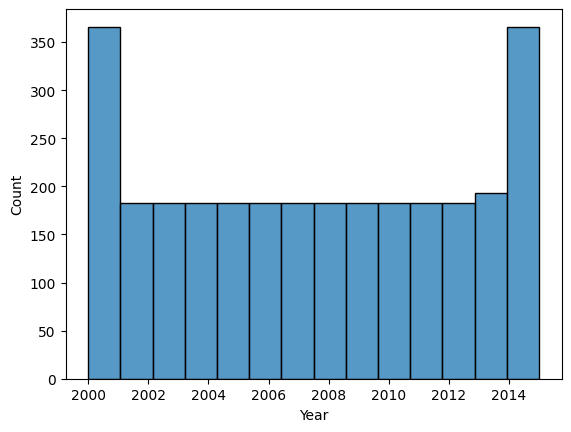

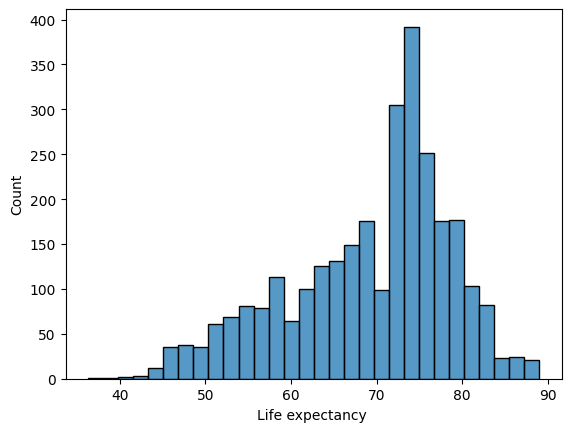

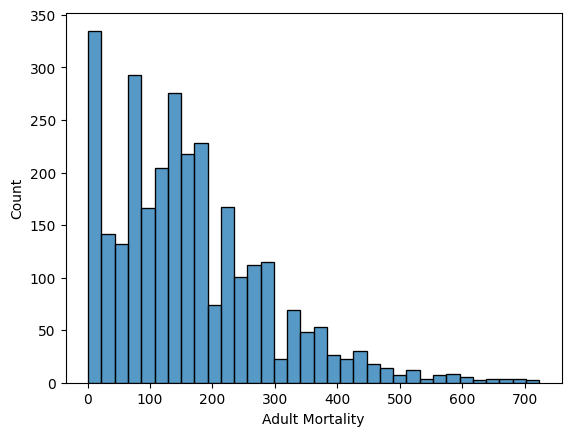

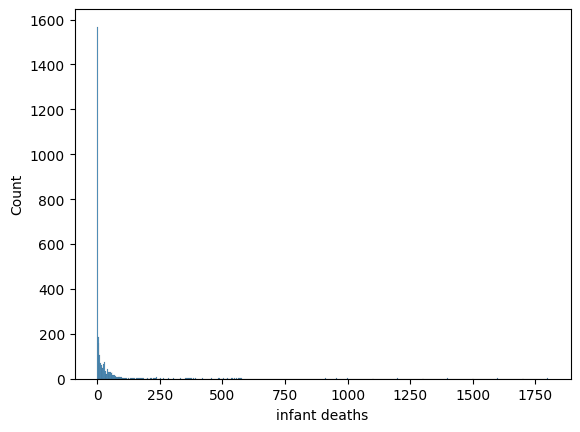

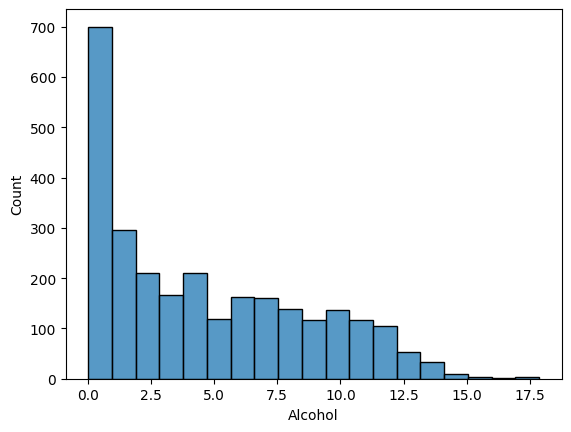

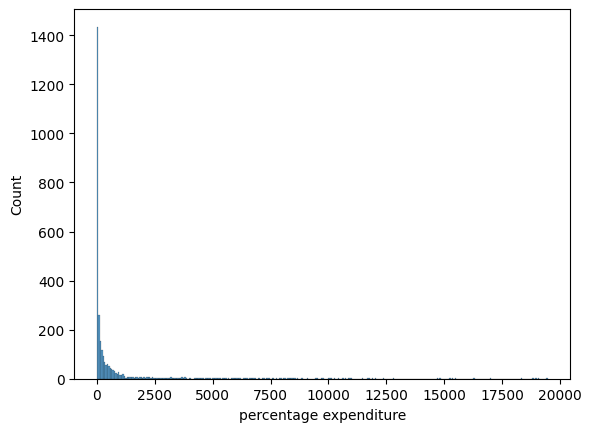

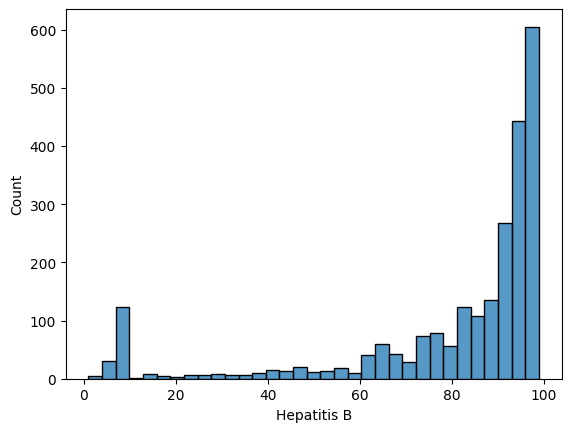

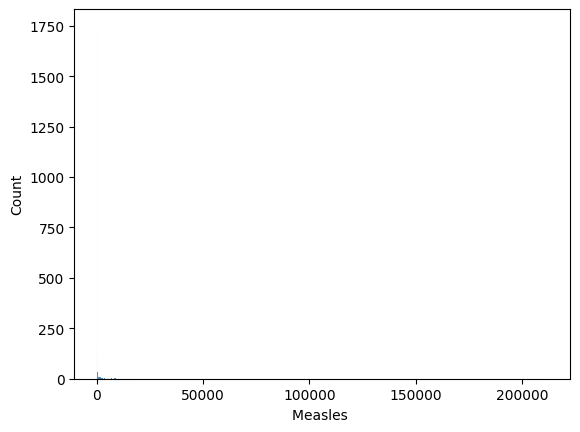

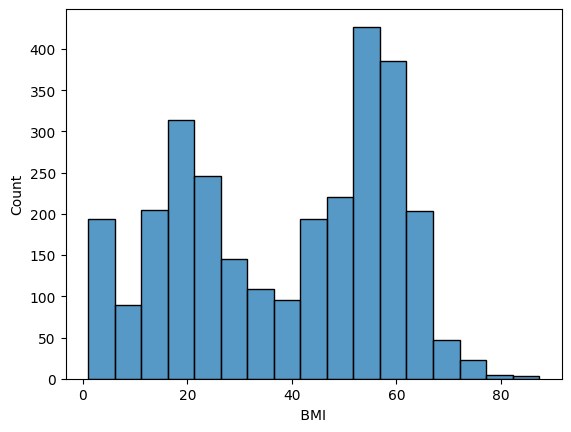

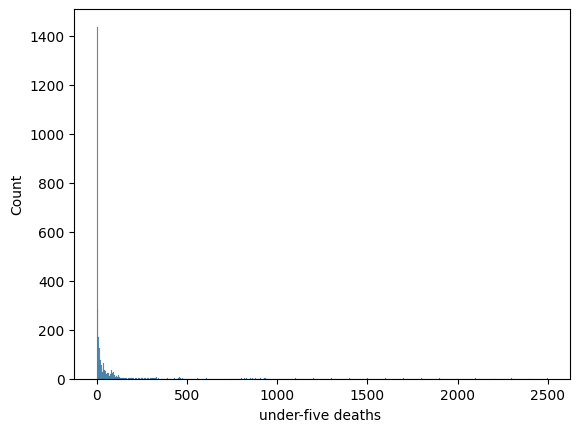

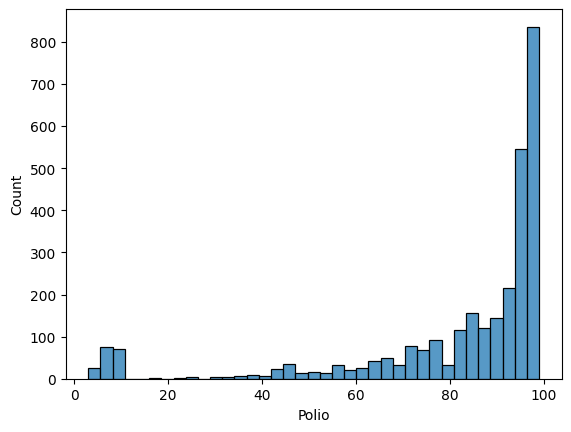

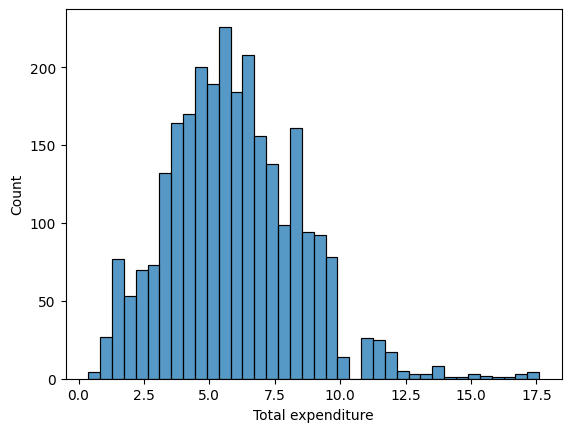

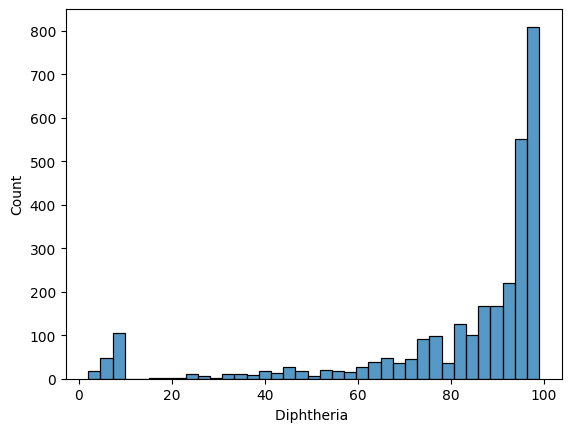

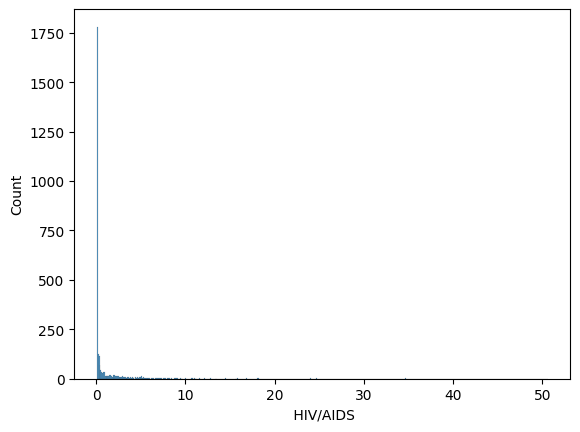

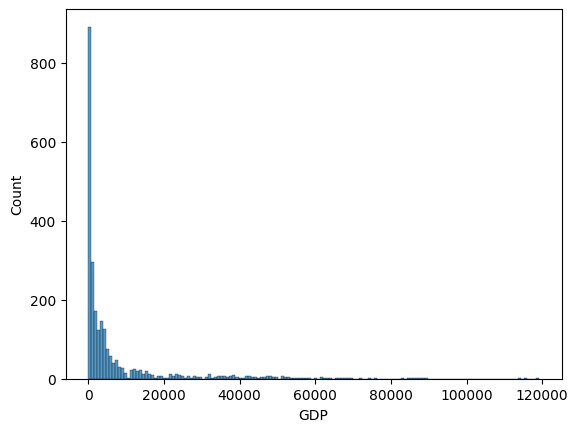

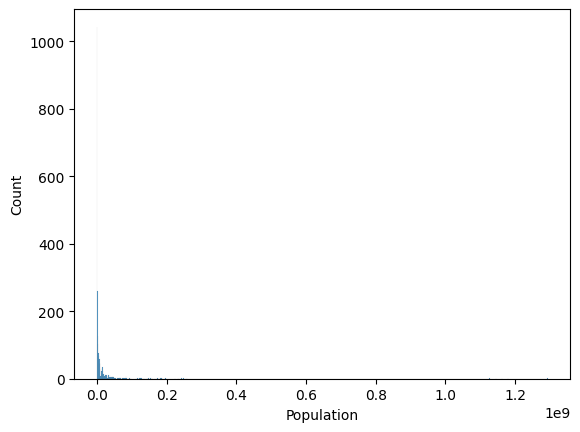

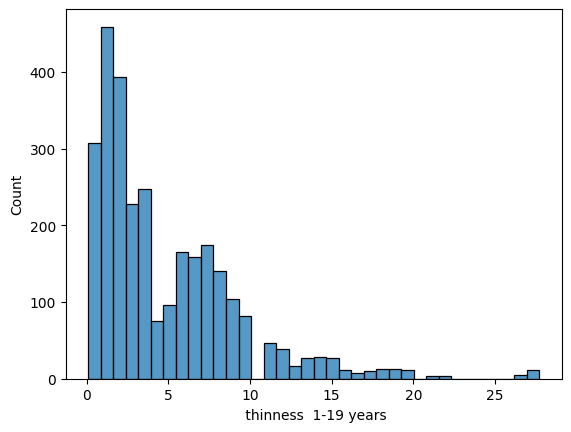

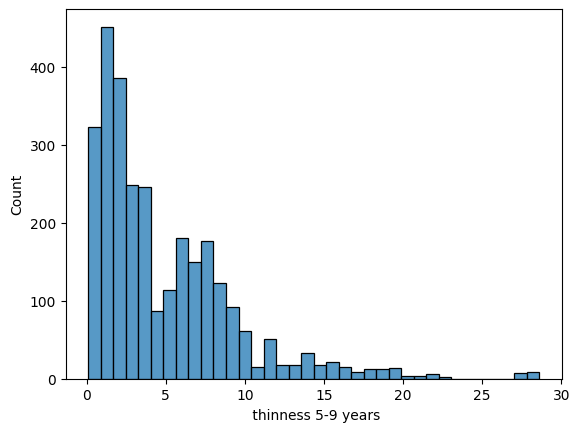

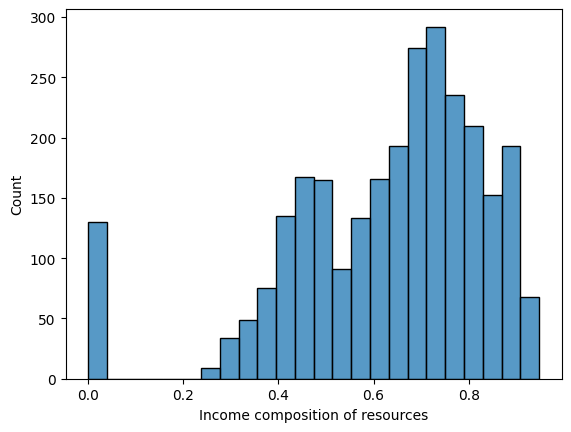

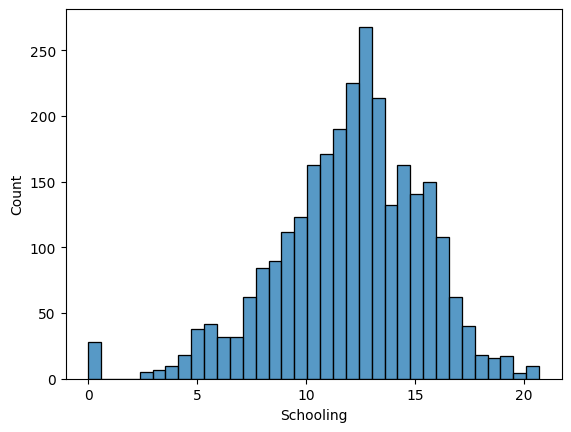

In [ ]:
# histogram to understand data distribution

for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

##Detecting Outliers

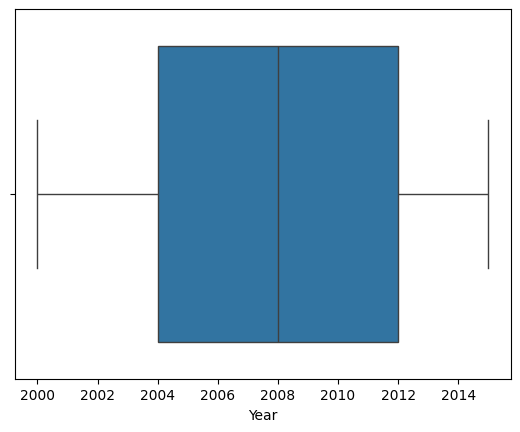

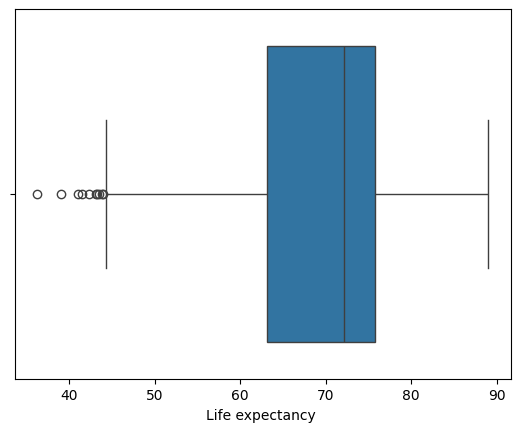

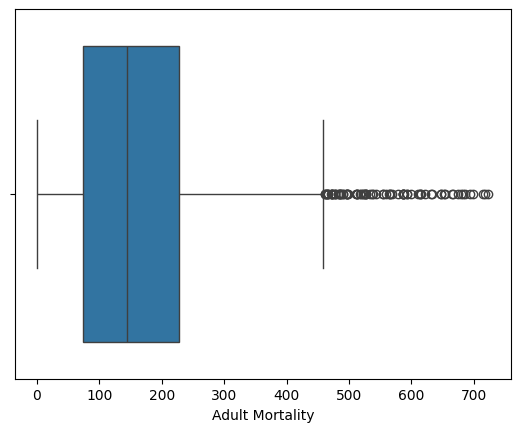

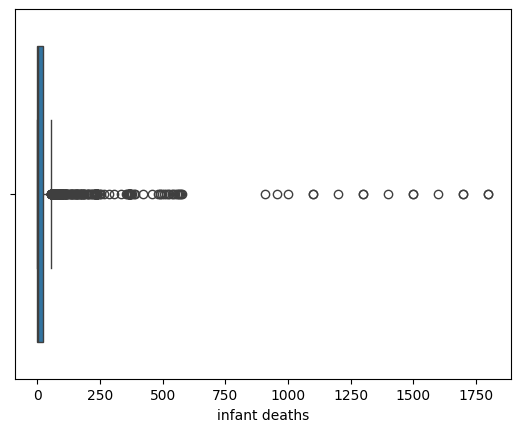

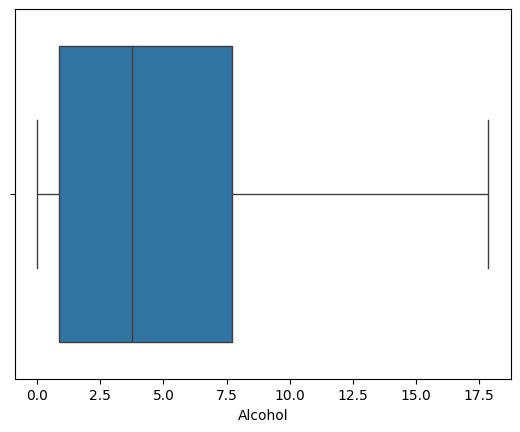

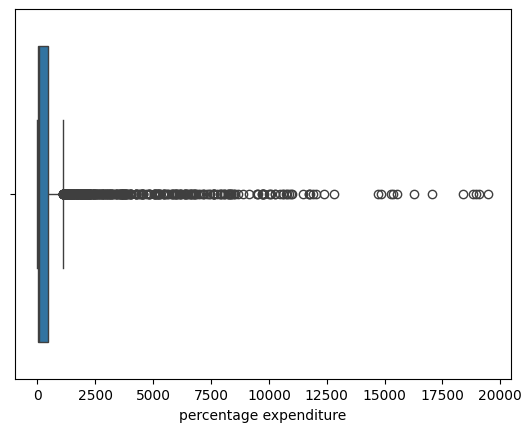

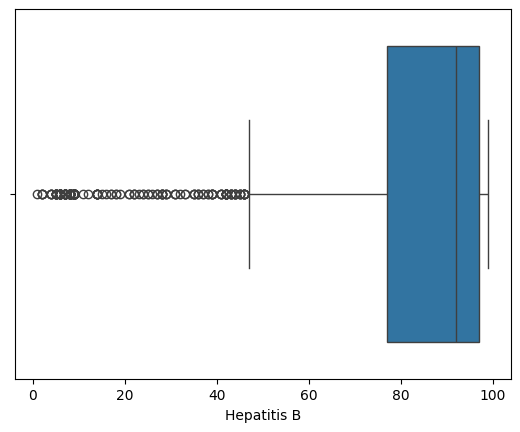

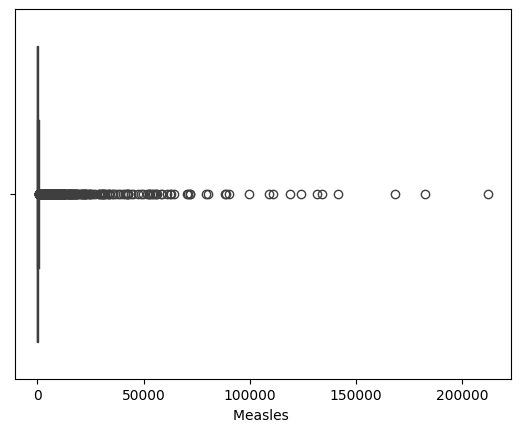

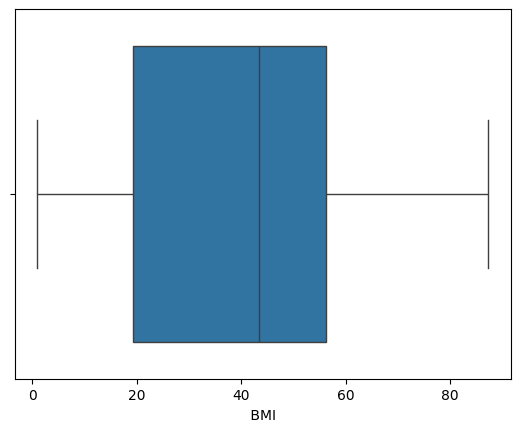

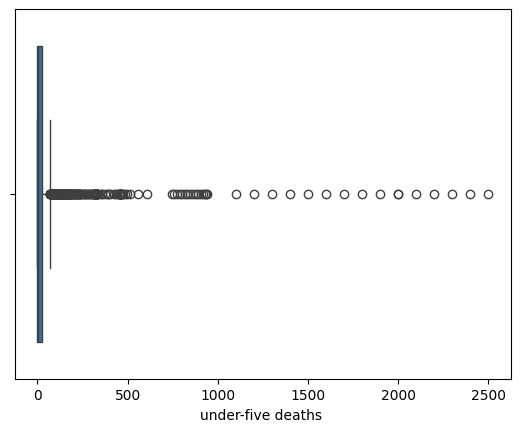

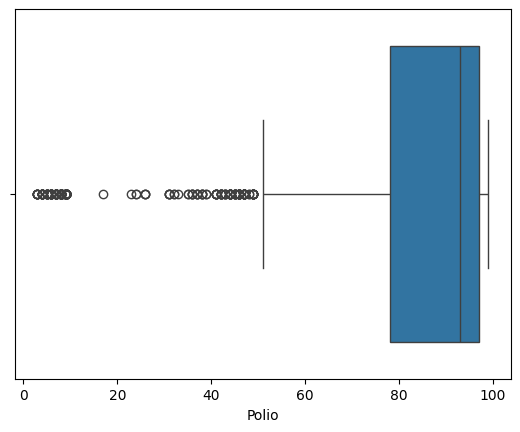

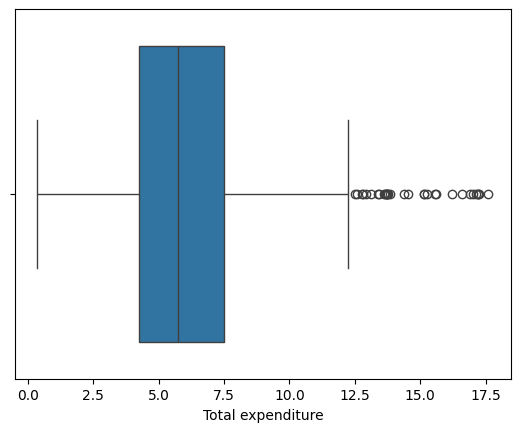

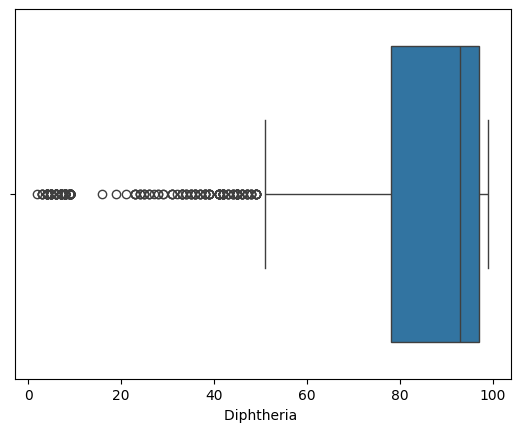

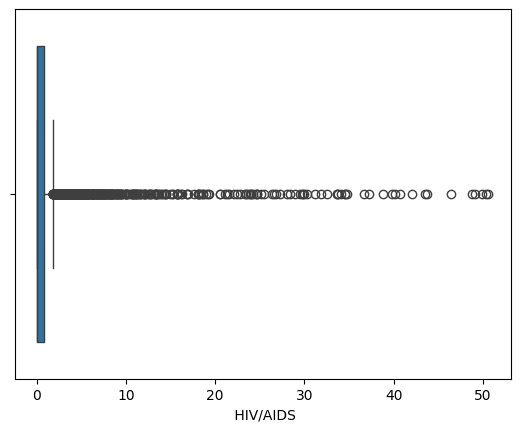

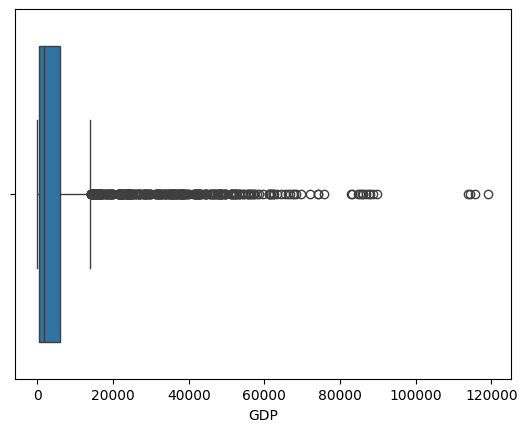

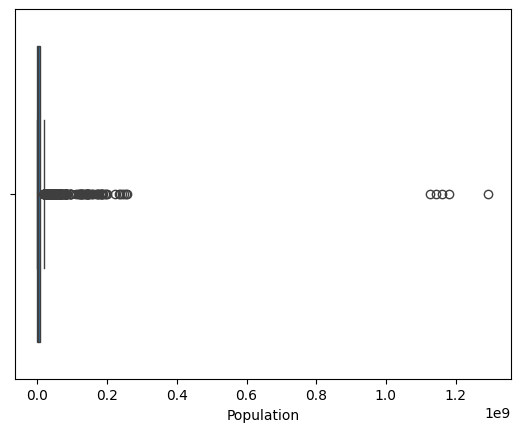

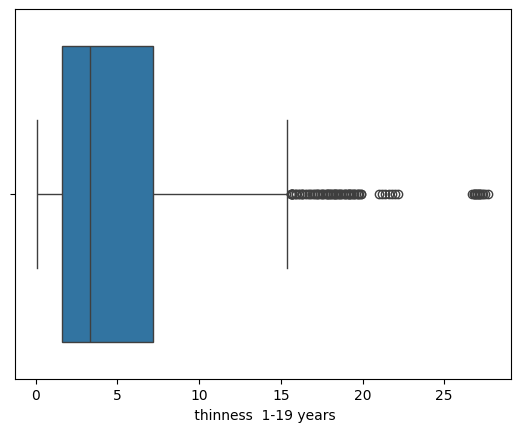

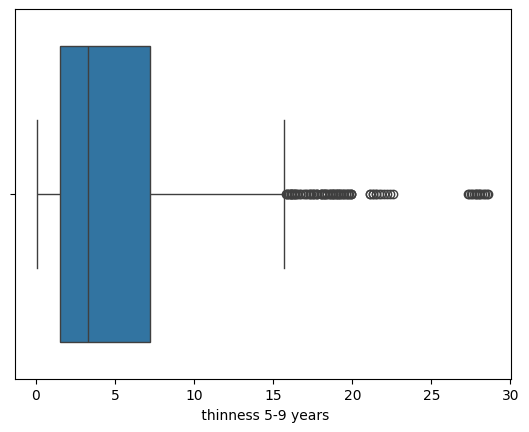

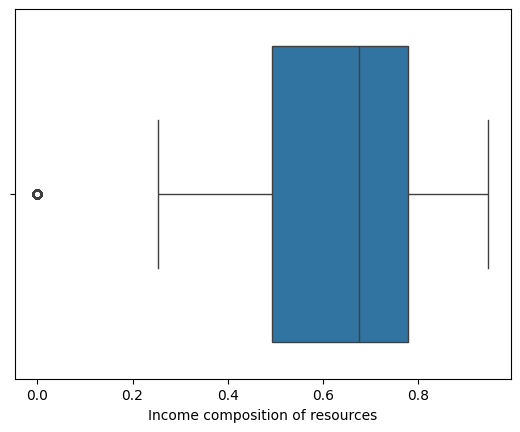

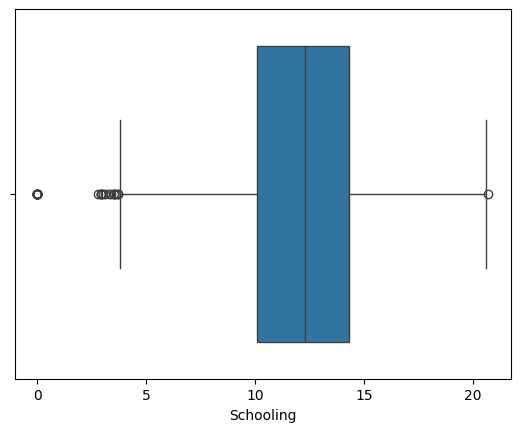

In [ ]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
#scatter plot to understand the relationship

numeric_columns = df.select_dtypes(include = "number").columns.drop('Life expectancy ')
print(numeric_columns)
print(df.shape)

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
(2938, 22)


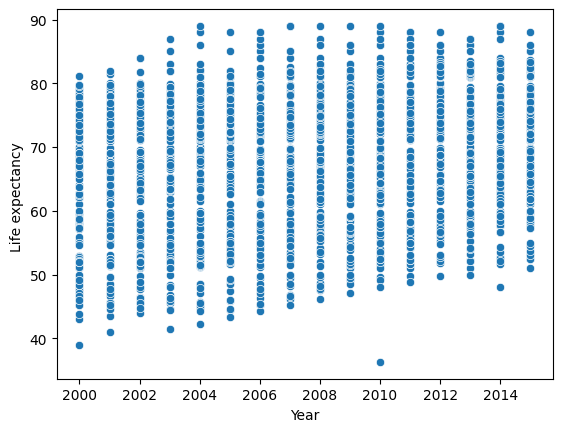

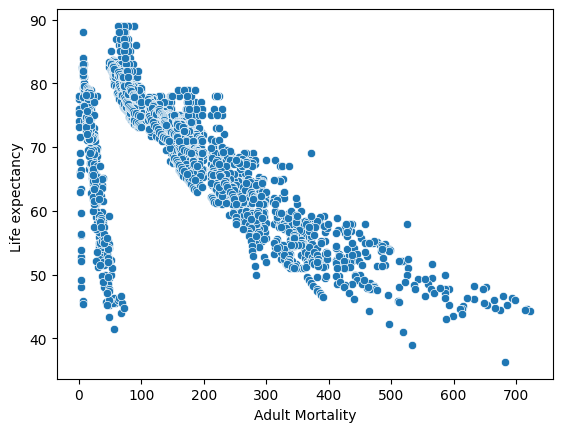

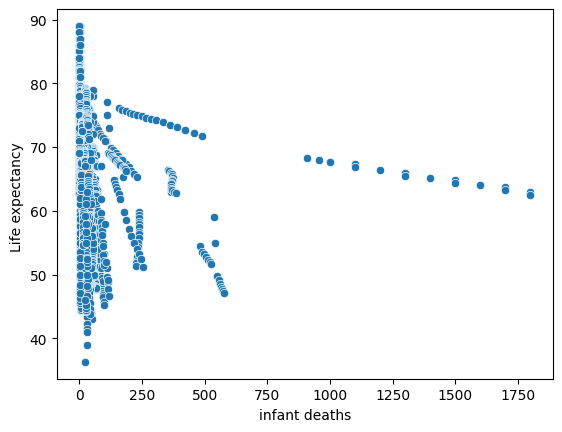

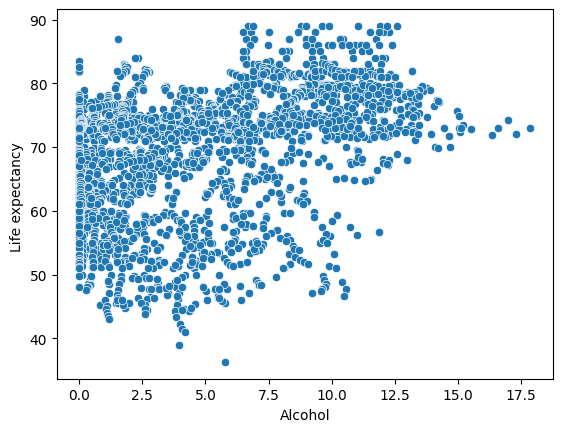

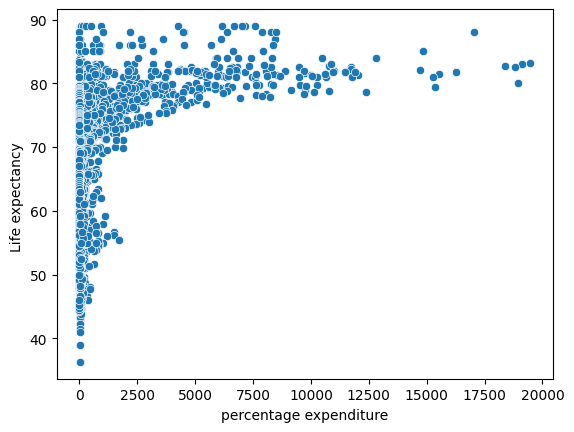

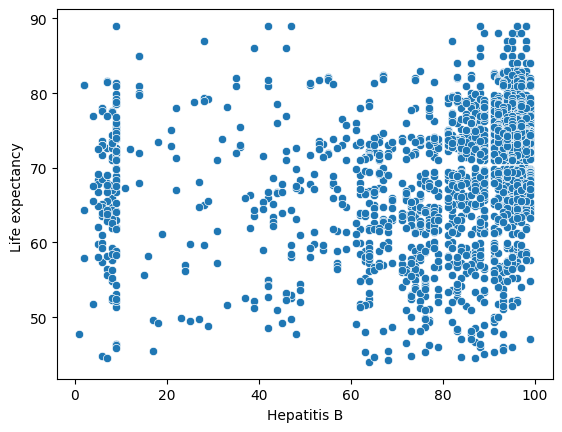

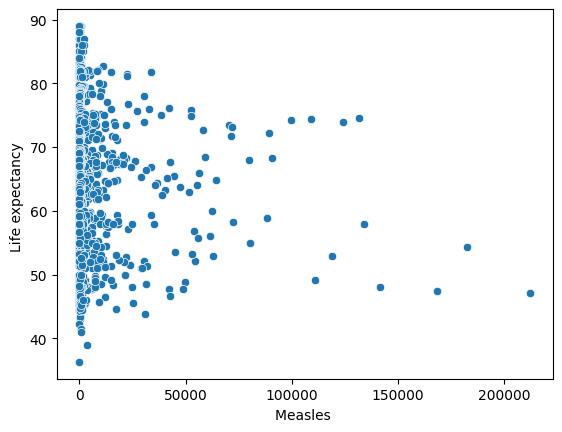

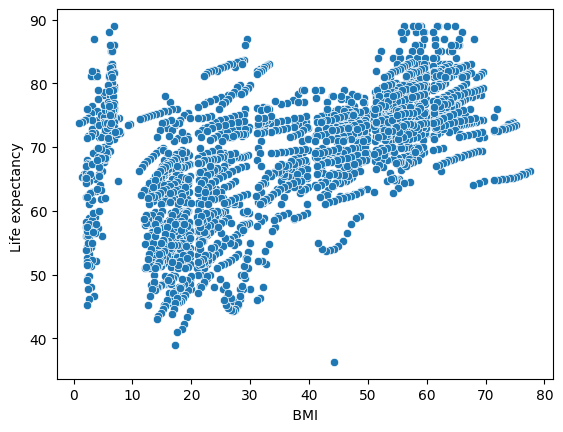

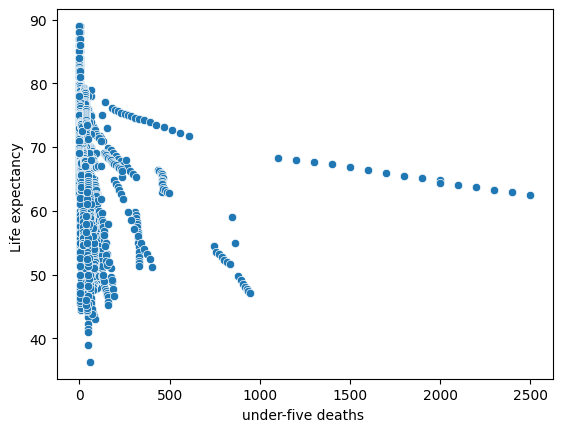

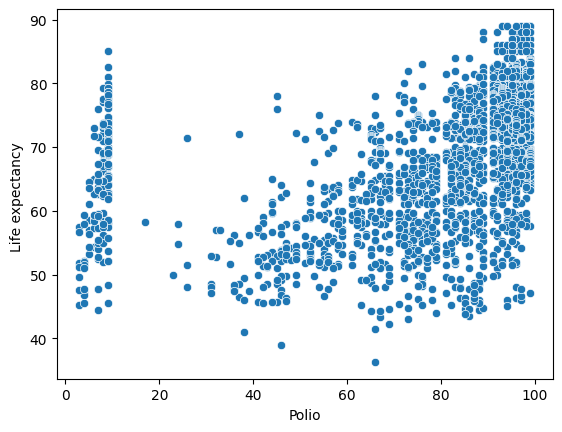

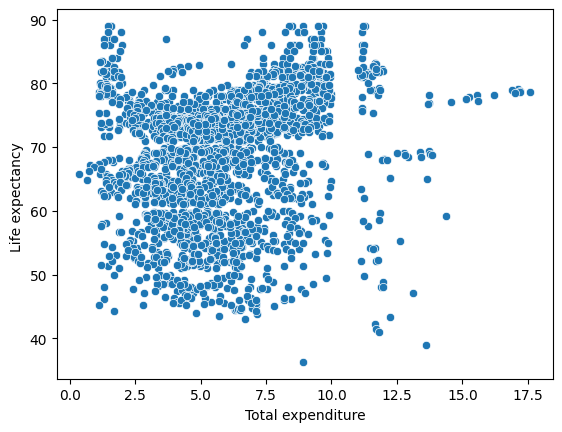

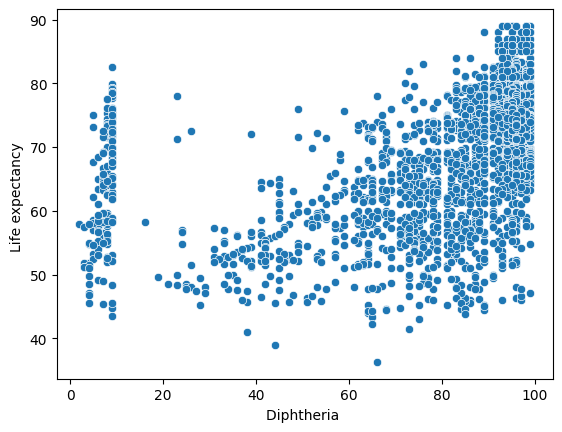

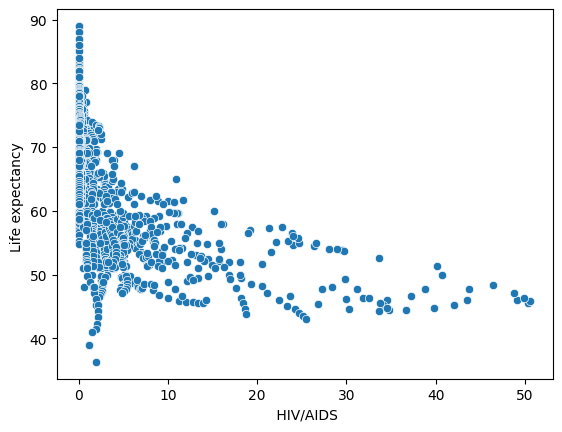

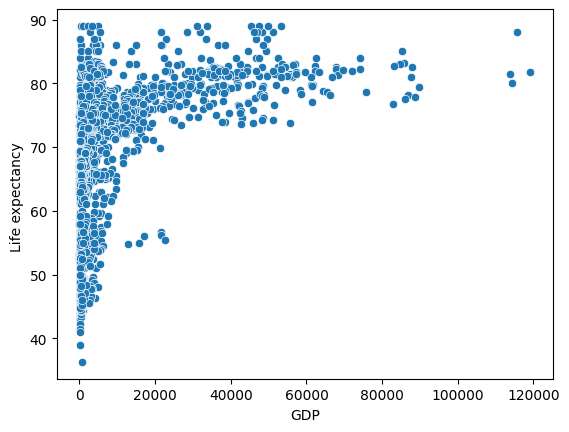

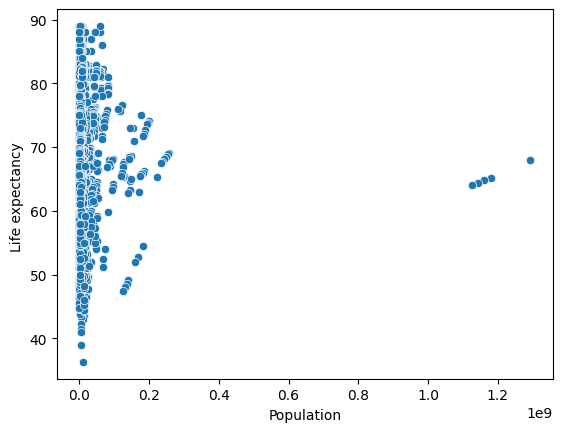

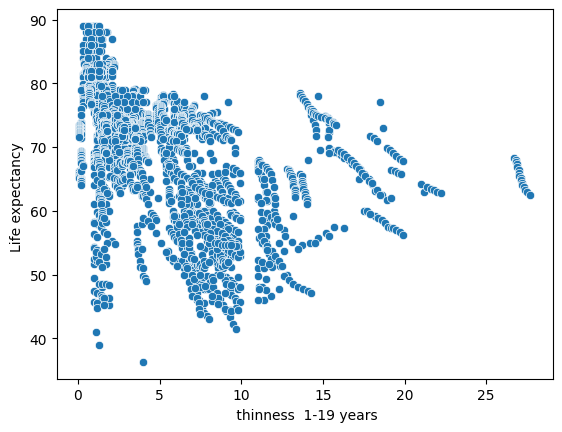

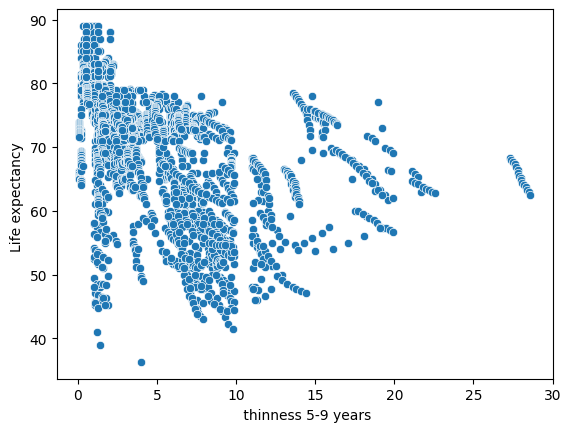

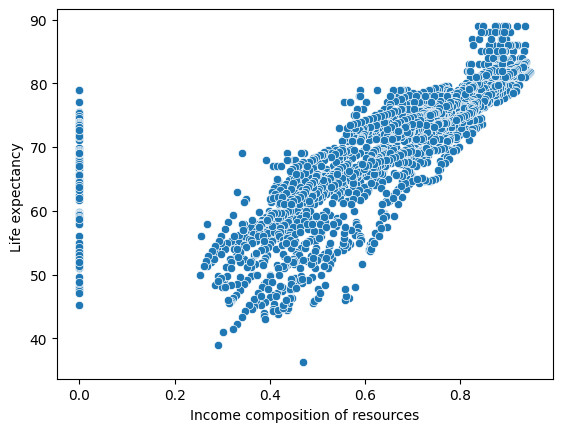

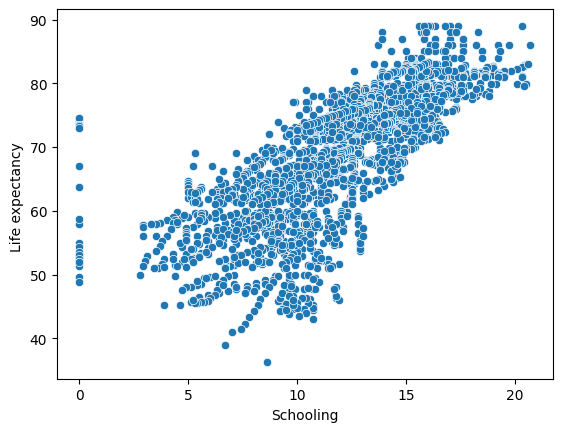

In [ ]:
for i in numeric_columns:
  sns.scatterplot(data=df, x =i,y = 'Life expectancy ' )
  plt.show()

In [ ]:
#correlation with heatmap to interpret the relation and multicolinearity
s = df.select_dtypes(include ="number").corr()
s

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.103010,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.459179,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.294422,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.107948,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.349106,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.897922,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083925,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.075993,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.300018,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.111600,0.544423,0.467789,0.472263,-0.163305,-0.209373


<Axes: >

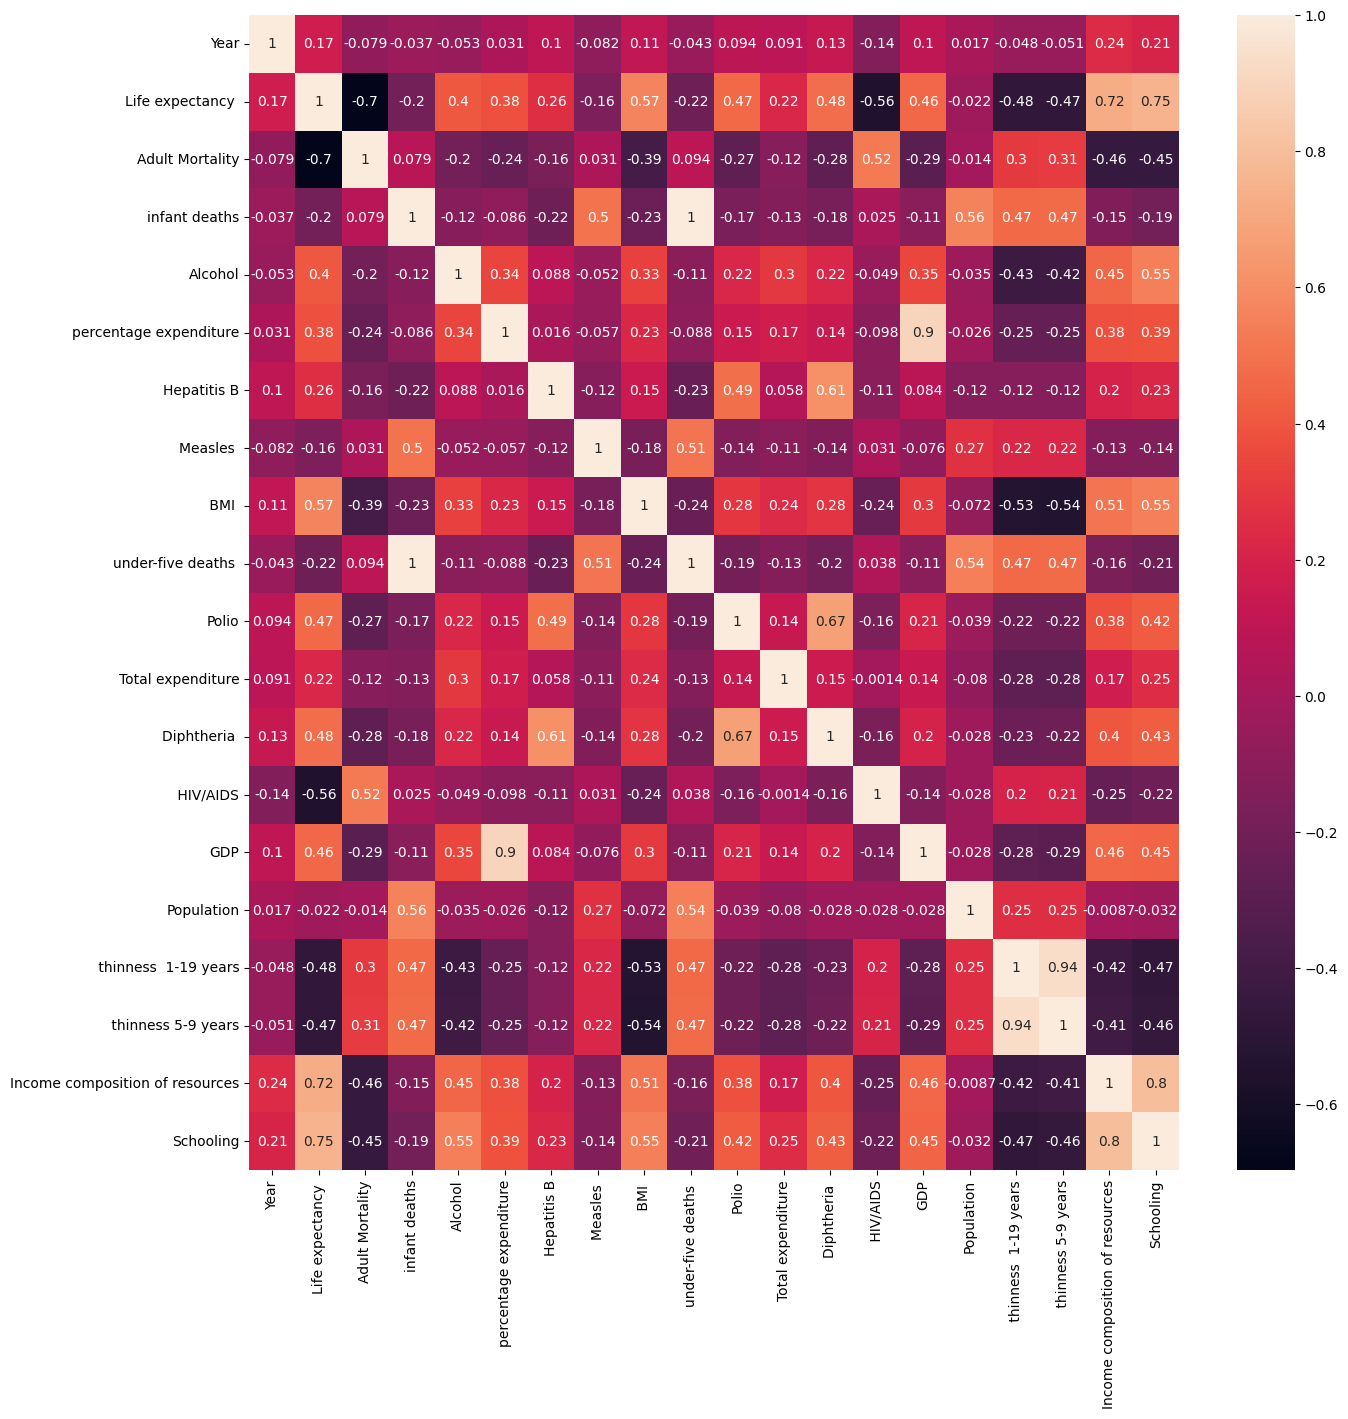

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot = True)

##5.Missing Value treatments

In [ ]:
#Your code
#Check for missing values

In [ ]:
# we dont handle missing values on target values .If we do so this can lead to missleading results when fitting the model.So we will remove the rows that have null target value
# Remove rows where the target column has null values
df = df.dropna(subset=['Life expectancy '])


In [ ]:
#your code
#choose the method of imputing missing values
#impute the missing values with median for numerical coulmns ' BMI ',"Polio","Income composition of resources"


In [ ]:
df.isnull().sum()

In [ ]:
df.select_dtypes(include = "object")

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
5,Afghanistan,Developing
...,...,...
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing
2937,Zimbabwe,Developing
2938,Zimbabwe,Developing


In [ ]:
#Your code
# we replace the null values of categorical columns with mode


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,193
percentage expenditure,0
Hepatitis B,553
Measles,0


### KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [ ]:
for i in df.select_dtypes(include = "number").columns:
  df[i] = impute.fit_transform(df[[i]])

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


## Handling Outliers
remember this procedure is applied on numerical data
dont apply it on categorical or discrete variables


In [ ]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw= q1- 1.5*iqr
  uw = q3 + 1.5*iqr
  return lw,uw


In [ ]:
wisker(df['GDP'])


(-9685.666671653365, 17688.515986088943)

In [ ]:
for i in ['GDP','Total expenditure',' thinness  1-19 years',' thinness 5-9 years']:
  lw,uw = wisker(df[i])
  df[i]= np.where(df[i] < lw,lw,df[i])
  df[i]= np.where(df[i] > uw,uw,df[i])


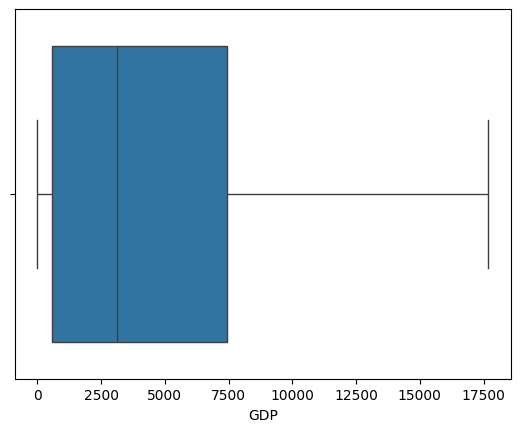

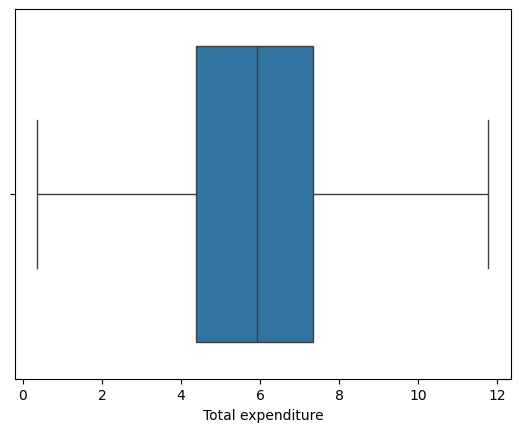

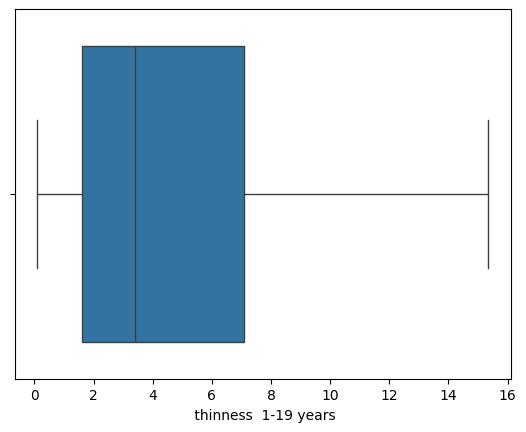

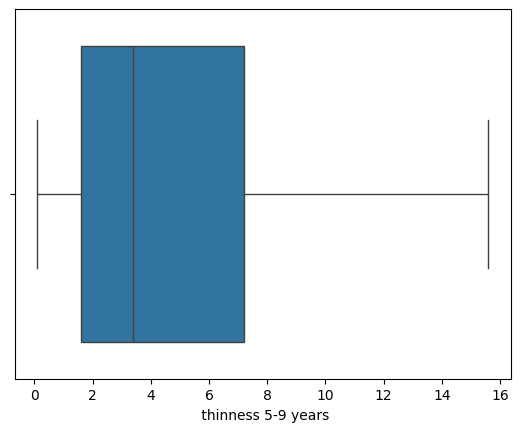

In [ ]:
for i in ['GDP','Total expenditure',' thinness  1-19 years',' thinness 5-9 years']:
  sns.boxplot(data=df,x=i)
  plt.show()

## Handling categorical columns

###One hot encoding vs label encoding

In [ ]:
df.select_dtypes(include= "object").columns

Index(['Country', 'Status'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Your code
# One-hot encode the 'Country' column

#Your Code
# Label encode the 'Status' column


In [ ]:
df

## Data Normalization

you can implement normalization (or more specifically standardization) after cleaning the data. In fact, it’s a good practice to first clean your data—handle missing values, outliers, or incorrect entries—and then proceed with standardization or normalization. This is because cleaning ensures that your data is in the best shape for transformation and modeling.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming `data` is your cleaned DataFrame

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(df)

# Convert the result back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)

# Display the standardized data
print(standardized_df.head())

       Year    Status  Life expectancy   Adult Mortality  infant deaths  \
0  1.626978  0.460348         -0.443691         0.790238       0.267520   
1  1.410048  0.460348         -0.979279         0.854614       0.284455   
2  1.193118  0.460348         -0.979279         0.830473       0.301391   
3  0.759257  0.460348         -1.052791         0.886801       0.343730   
4  0.976187  0.460348         -1.021286         0.862660       0.326794   

    Alcohol  percentage expenditure  Hepatitis B  Measles       BMI   ...  \
0 -1.176432               -0.336102    -0.708504 -0.110924 -0.966625  ...   
1 -1.176432               -0.334975    -0.841675 -0.168570 -0.991809  ...   
2 -1.176432               -0.335128    -0.752895 -0.173968 -1.016993  ...   
3 -1.176432               -0.368345    -0.575334  0.050953 -1.062324  ...   
4 -1.176432               -0.332633    -0.619724  0.031273 -1.042177  ...   

   Country_United Republic of Tanzania  Country_United States of America  \
0         